In [1]:
import pyforest

In [5]:
df = pd.read_csv('recipe_dataste/full_dataset.csv')
df.head()

<IPython.core.display.Javascript object>

,Unnamed: 0,title,ingredients,directions,link,source,NER
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."


In [42]:
df[(df['NER'].str.contains('Potato', case=False, na=False))]

,Unnamed: 0,title,ingredients,directions,link,source,NER
5,5,Cheeseburger Potato Soup,"[""6 baking potatoes"", ""1 lb. of extra lean gro...","[""Wash potatoes; prick several times with a fo...",www.cookbooks.com/Recipe-Details.aspx?id=20115,Gathered,"[""baking potatoes"", ""extra lean ground beef"", ..."
33,33,Potato And Cheese Pie,"[""3 eggs"", ""1 tsp. salt"", ""1/4 tsp. pepper"", ""...","[""Beat eggs, salt and pepper until well blende...",www.cookbooks.com/Recipe-Details.aspx?id=784386,Gathered,"[""eggs"", ""salt"", ""pepper"", ""potatoes"", ""Chedda..."
40,40,Chicken Stew,"[""3 lb. chicken, boiled"", ""4 medium potatoes, ...","[""Remove chicken from bone."", ""Use the broth.""...",www.cookbooks.com/Recipe-Details.aspx?id=284237,Gathered,"[""chicken"", ""potatoes"", ""onions"", ""corn"", ""Eng..."
71,71,Potato Casserole,"[""6 c. diced potatoes"", ""1/2 c. chopped onion""...","[""Peel and dice potatoes; place in bowl of col...",www.cookbooks.com/Recipe-Details.aspx?id=261749,Gathered,"[""potatoes"", ""onion"", ""butter"", ""cream of chic..."
103,103,German Potato Salad,"[""4 lb. potatoes, cooked"", ""6 slices bacon, di...","[""Peel and cut potatoes in thin slices."", ""Fry...",www.cookbooks.com/Recipe-Details.aspx?id=609338,Gathered,"[""potatoes"", ""bacon"", ""sugar"", ""flour"", ""salt""..."
...,...,...,...,...,...,...,...
2231002,2231002,Green Bean Casserole with Sausage,"[""1 pound Jimmy Deans Maple Sausage (ground)"",...","[""Preheat the oven to 350 degrees F."", ""First ...",tastykitchen.com/recipes/main-courses/green-be...,Recipes1M,"[""Maple Sausage"", ""Cream Of Mushroom Soup"", ""M..."
2231051,2231051,Potatoes Vinaigrette,"[""1 1/2 pounds new potatoes, scrubbed"", ""Coars...","[""Place potatoes in a medium saucepan and cove...",www.epicurious.com/recipes/food/views/potatoes...,Recipes1M,"[""new potatoes"", ""salt"", ""white-wine vinegar"",..."
2231072,2231072,Potato and Leek Pancakes,"[""550 g floury potatoes, such as russett, peel...","[""For the pancakes: put the potatoes in a pan ...",www.food.com/recipe/potato-and-leek-pancakes-2...,Recipes1M,"[""floury potatoes"", ""leeks"", ""flour"", ""baking ..."
2231090,2231090,Rachel's Potato Puff,"[""3 large potatoes"", ""1 cup of matured cheese""...","[""Peel potatoes."", ""Grate potatoes and cheese....",www.food.com/recipe/rachels-potato-puff-230570,Recipes1M,"[""potatoes"", ""matured cheese"", ""milk"", ""eggs"",..."


In [149]:
a = df.iloc[2231136]['NER']
a

'["sweet onion", "butter", "curry powder", "carrot", "red potatoes", "then", "coconut milk", "vegetable broth", "soy sauce", "green onion", "crabmeat", "salt"]'

In [144]:
import pandas as pd
import ast

indian_vegetables = ['potato', 'potatoes', 'tomato', 'tomatoes', 'onion', 'onions', 'garlic', 'garlic cloves', 
'ginger', 'gingers', 'green chili', 'green chilies', 'capsicum', 'capsicums', 
'cauliflower', 'cauliflowers', 'cabbage', 'cabbages', 'spinach', 'spinaches', 
'fenugreek', 'fenugreeks', 'coriander', 'corianders', 'mint', 'mints', 
'carrot', 'carrots', 'radish', 'radishes', 'beetroot', 'beetroots', 
'pumpkin', 'pumpkins', 'bottle gourd', 'bottle gourds', 'bitter gourd', 
'bitter gourds', 'ridge gourd', 'ridge gourds', 'sponge gourd', 
'sponge gourds', 'brinjal', 'brinjals', 'lady finger', 'lady fingers', 
'cluster beans', 'cluster beans', 'french beans', 'french beans', 
'green peas', 'green peas', 'curry leaf', 'curry leaves', 
'taro root', 'taro roots', 'yam', 'yams', 'drumstick', 'drumsticks', 
'sweet potato', 'sweet potatoes', 'broccoli', 'broccolis', 
'zucchini', 'zucchinis', 'hyacinth beans', 'hyacinth beans', 
'amaranth leaves', 'amaranth leaves', 'mustard greens', 'mustard greens', 
'turnip', 'turnips', 'kohlrabi', 'kohlrabis', 'snake gourd', 
'snake gourds', 'ash gourd', 'ash gourds', 'pointed gourd', 
'pointed gourds', 'jackfruit', 'jackfruits', 'bitter melon', 
'bitter melons', 'cucumber', 'cucumbers', 'corn', 'corn kernels', 
'bell peppers', 'bell peppers', 'spring onion', 'spring onions', 
'lettuce', 'lettuces', 'chayote', 'chayotes', 'ivy gourd', 
'ivy gourds', 'raw banana', 'raw bananas', 'sapodilla', 'sapodillas', 
'mushrooms', 'mushrooms']

def filter_vegetables(a):
    # Split the string into a list by commas, then strip any extra spaces
    ingredients = ast.literal_eval(a)
    ingredients = [veg.lower() for veg in ingredients]
    # Check which ingredients are in the vegetable list
    vegetables = [ingredient for ingredient in ingredients if ingredient in indian_vegetables]
    return vegetables


df['Vegetables'] = df['NER'].apply(filter_vegetables)


In [153]:
df

,Unnamed: 0,title,ingredients,directions,link,source,NER,Vegetables
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu...",
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom...",
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar...",
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo...",
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu...",
...,...,...,...,...,...,...,...,...
2231137,2231137,Sunny's Fake Crepes,"[""1/2 cup chocolate hazelnut spread (recommend...","[""Spread hazelnut spread on 1 side of each tor...",www.foodnetwork.com/recipes/sunny-anderson/sun...,Recipes1M,"[""chocolate hazelnut spread"", ""tortillas"", ""bu...",
2231138,2231138,Devil Eggs,"[""1 dozen eggs"", ""1 paprika"", ""1 salt and pepp...","[""Boil eggs on medium for 30mins."", ""Then cool...",cookpad.com/us/recipes/355411-devil-eggs,Recipes1M,"[""eggs"", ""paprika"", ""salt"", ""choice"", ""miracle...",
2231139,2231139,Extremely Easy and Quick - Namul Daikon Salad,"[""150 grams Daikon radish"", ""1 tbsp Sesame oil...","[""Julienne the daikon and squeeze out the exce...",cookpad.com/us/recipes/153324-extremely-easy-a...,Recipes1M,"[""radish"", ""Sesame oil"", ""White sesame seeds"",...",radish
2231140,2231140,Pan-Roasted Pork Chops With Apple Fritters,"[""1 cup apple cider"", ""6 tablespoons sugar"", ""...","[""In a large bowl, mix the apple cider with 4 ...",cooking.nytimes.com/recipes/1015164,Recipes1M,"[""apple cider"", ""sugar"", ""kosher salt"", ""bay l...",


In [260]:
df2 = df.copy()

In [261]:
# Remove rows where the 'Vegetables' column is an empty list or an empty string
df2 = df2[df2['Vegetables'].apply(lambda x: x != '' and x != [] and len(x) > 0)]
df2

,Unnamed: 0,title,ingredients,directions,link,source,NER,Vegetables
8,8,Nolan'S Pepper Steak,"[""1 1/2 lb. round steak (1-inch thick), cut in...","[""Roll steak strips in flour."", ""Brown in skil...",www.cookbooks.com/Recipe-Details.aspx?id=375254,Gathered,"[""tomatoes"", ""water"", ""onions"", ""Worcestershir...","tomatoes, onions"
13,13,Taco Salad Chip Dip,"[""8 oz. Ortega taco sauce"", ""8 oz. sour cream""...","[""Mix taco sauce, sour cream and cream cheese....",www.cookbooks.com/Recipe-Details.aspx?id=806409,Gathered,"[""taco sauce"", ""sour cream"", ""cream cheese"", ""...","tomato, onion"
17,17,Broccoli Salad,"[""1 large head broccoli (about 1 1/2 lb.)"", ""1...","[""Trim off large leaves of broccoli and remove...",www.cookbooks.com/Recipe-Details.aspx?id=50992,Gathered,"[""broccoli"", ""bacon"", ""green onions"", ""raisins...",broccoli
22,22,Cuddy Farms Marinated Turkey,"[""2 c. 7-Up or Sprite"", ""1 c. vegetable oil"", ...","[""Buy whole turkey breast; remove all skin and...",www.cookbooks.com/Recipe-Details.aspx?id=9449,Gathered,"[""vegetable oil"", ""soy sauce"", ""garlic""]",garlic
23,23,Spaghetti Sauce To Can,"[""1/2 bushel tomatoes"", ""1 c. oil"", ""1/4 c. mi...","[""Cook ground or chopped peppers and onions in...",www.cookbooks.com/Recipe-Details.aspx?id=1059279,Gathered,"[""tomatoes"", ""oil"", ""garlic"", ""tomato paste"", ...","tomatoes, garlic"
...,...,...,...,...,...,...,...,...
2231130,2231130,Weeknight Lasagna Toss,"[""1 lb. lean ground beef Safeway 1 lb For $3.9...","[""Brown meat in large saucepan; drain."", ""Add ...",www.kraftrecipes.com/recipes/weeknight-lasagna...,Recipes1M,"[""lean ground beef"", ""green peppers"", ""garlic""...",garlic
2231131,2231131,Roasted Garlicpea Puree on Sourdough Croutes,"[""1 sourdough baguette"", ""1/4 cup extra-virgin...","[""Preheat oven to 400F."", ""Diagonally cut twen...",www.epicurious.com/recipes/food/views/roasted-...,Recipes1M,"[""baguette"", ""extra-virgin olive oil"", ""garlic...",garlic
2231136,2231136,Curried Asparagus Vichyssoise,"[""1 sweet onion, chopped (Vidalia, Maui, etc.)...","[""Cook the onion in butter in a medium saucepa...",www.food.com/recipe/curried-asparagus-vichysso...,Recipes1M,"[""sweet onion"", ""butter"", ""curry powder"", ""car...",carrot
2231139,2231139,Extremely Easy and Quick - Namul Daikon Salad,"[""150 grams Daikon radish"", ""1 tbsp Sesame oil...","[""Julienne the daikon and squeeze out the exce...",cookpad.com/us/recipes/153324-extremely-easy-a...,Recipes1M,"[""radish"", ""Sesame oil"", ""White sesame seeds"",...",radish


In [262]:
def singularize(words:str):
    words = words.split(',')
    irregulars = {
        'potatoes': 'potato',
        'tomatoes': 'tomato',
        'onions': 'onion',
        'garlic cloves': 'garlic',
        'gingers': 'ginger',
        'chilies': 'chili',
        'capsicums': 'capsicum',
        'cauliflowers': 'cauliflower',
        'cabbages': 'cabbage',
        'spinaches': 'spinach',
        'fenugreeks': 'fenugreek',
        'corianders': 'coriander',
        'mints': 'mint',
        'carrots': 'carrot',
        'radishes': 'radish',
        'beetroots': 'beetroot',
        'pumpkins': 'pumpkin',
        'gourds': 'gourd',
        'brinjals': 'brinjal',
        'fingers': 'finger',
        'beans': 'bean',
        'peas': 'pea',
        'leaves': 'leaf',
        'roots': 'root',
        'yams': 'yam',
        'drumsticks': 'drumstick',
        'broccolis': 'broccoli',
        'zucchinis': 'zucchini',
        'greens': 'green',
        'turnips': 'turnip',
        'kohlrabis': 'kohlrabi',
        'melons': 'melon',
        'cucumbers': 'cucumber',
        'kernels': 'kernel',
        'peppers': 'pepper',
        'onions': 'onion',
        'lettuces': 'lettuce',
        'chayotes': 'chayote',
        'bananas': 'banana',
        'sapodillas': 'sapodilla',
        'mushrooms': 'mushroom'
    }
    li = irregulars.keys()
    temp = []
    for word in words:
        if word in li:
            temp.append(irregulars[word])
        else:
            temp.append(word)
    temp = ','.join(temp)
    return temp


In [259]:
singularize(df2.iloc[4]['Vegetables'])


'cabbage,onion'

In [254]:
df2.iloc[4]['Vegetables']

'tomatoes, garlic'

In [228]:
''.join(a)

"['tomato', ' garlic']"

In [263]:
df2['Vegetables'] = df2['Vegetables'].apply(singularize)

In [272]:
df3 = df2.head(50)
df3

,Unnamed: 0,title,ingredients,directions,link,source,NER,Vegetables
8,8,Nolan'S Pepper Steak,"[""1 1/2 lb. round steak (1-inch thick), cut in...","[""Roll steak strips in flour."", ""Brown in skil...",www.cookbooks.com/Recipe-Details.aspx?id=375254,Gathered,"[""tomatoes"", ""water"", ""onions"", ""Worcestershir...","tomato, onions"
13,13,Taco Salad Chip Dip,"[""8 oz. Ortega taco sauce"", ""8 oz. sour cream""...","[""Mix taco sauce, sour cream and cream cheese....",www.cookbooks.com/Recipe-Details.aspx?id=806409,Gathered,"[""taco sauce"", ""sour cream"", ""cream cheese"", ""...","tomato, onion"
17,17,Broccoli Salad,"[""1 large head broccoli (about 1 1/2 lb.)"", ""1...","[""Trim off large leaves of broccoli and remove...",www.cookbooks.com/Recipe-Details.aspx?id=50992,Gathered,"[""broccoli"", ""bacon"", ""green onions"", ""raisins...",broccoli
22,22,Cuddy Farms Marinated Turkey,"[""2 c. 7-Up or Sprite"", ""1 c. vegetable oil"", ...","[""Buy whole turkey breast; remove all skin and...",www.cookbooks.com/Recipe-Details.aspx?id=9449,Gathered,"[""vegetable oil"", ""soy sauce"", ""garlic""]",garlic
23,23,Spaghetti Sauce To Can,"[""1/2 bushel tomatoes"", ""1 c. oil"", ""1/4 c. mi...","[""Cook ground or chopped peppers and onions in...",www.cookbooks.com/Recipe-Details.aspx?id=1059279,Gathered,"[""tomatoes"", ""oil"", ""garlic"", ""tomato paste"", ...","tomato, garlic"
24,24,Prize-Winning Meat Loaf,"[""1 1/2 lb. ground beef"", ""1 c. tomato juice"",...","[""Mix well."", ""Press firmly into an 8 1/2 x 4 ...",www.cookbooks.com/Recipe-Details.aspx?id=923674,Gathered,"[""ground beef"", ""tomato juice"", ""oats"", ""egg"",...",onion
25,25,Smothered Round Steak(Servings: 4),"[""2 lb. round steak"", ""1/2 tsp. ground black p...","[""Alex Patout says, \""Smothering is a multipur...",www.cookbooks.com/Recipe-Details.aspx?id=982859,Gathered,"[""steak"", ""ground black pepper"", ""ground white...","bell peppers, onions"
26,26,Corral Barbecued Beef Steak Strips,"[""2 lb. round steak 1/2 to 3/4-inch thick, sli...","[""Brown strips in cooking oil."", ""Pour off dri...",www.cookbooks.com/Recipe-Details.aspx?id=420402,Gathered,"[""long"", ""cooking oil"", ""tomato sauce"", ""water...",onion
28,28,Taco-Filled Green Pepper,"[""1 lb. Ground Beef"", ""1 pkg. taco seasoning"",...","[""In a large skillet, brown the ground beef. D...",www.cookbooks.com/Recipe-Details.aspx?id=39004,Gathered,"[""Ground Beef"", ""taco seasoning"", ""beans"", ""on...","onion, tomato"
33,33,Potato And Cheese Pie,"[""3 eggs"", ""1 tsp. salt"", ""1/4 tsp. pepper"", ""...","[""Beat eggs, salt and pepper until well blende...",www.cookbooks.com/Recipe-Details.aspx?id=784386,Gathered,"[""eggs"", ""salt"", ""pepper"", ""potatoes"", ""Chedda...",potato


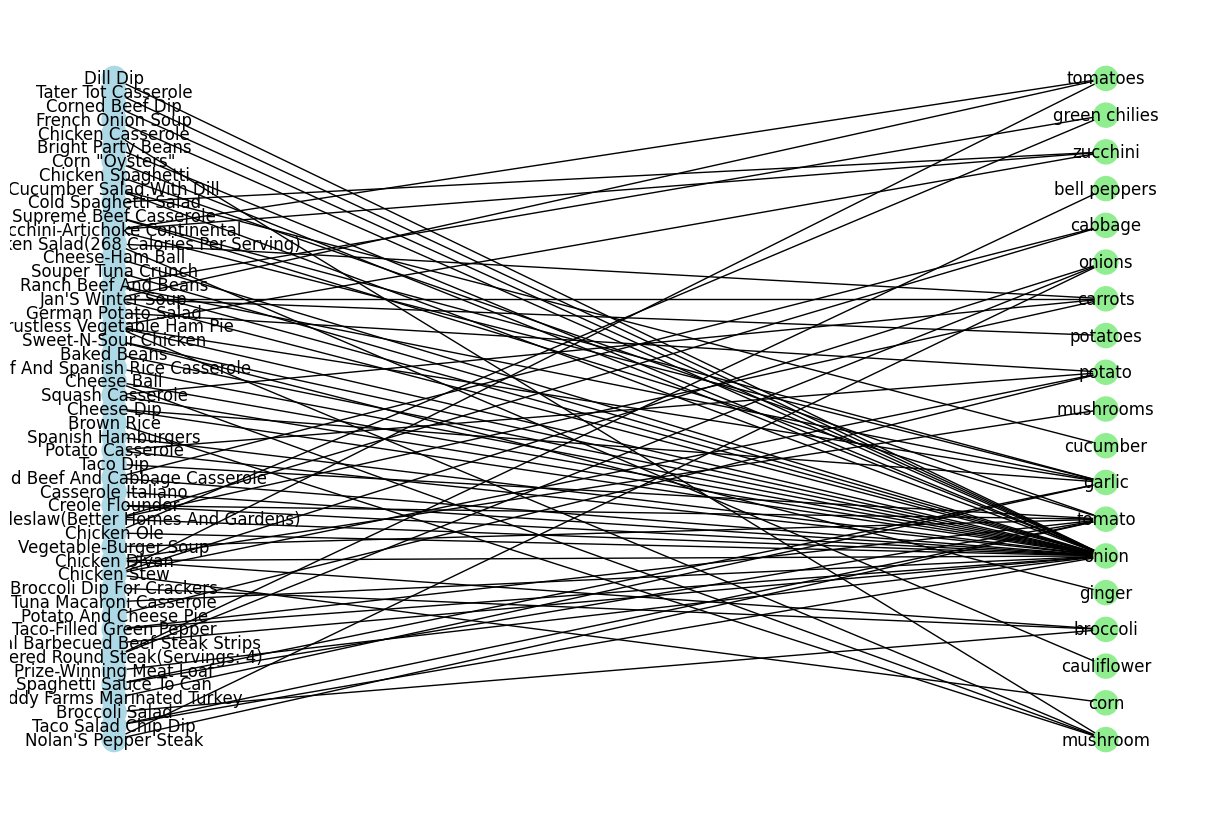

In [274]:
import networkx as nx
import matplotlib.pyplot as plt

B = nx.Graph()

# Add title and vegetable nodes
title_nodes = df3['title'].tolist()
vegetable_nodes = set([veg for veg_list in df3['Vegetables'].str.split(', ') for veg in veg_list])

B.add_nodes_from(title_nodes, bipartite=0)  # Add title nodes (layer 0)
B.add_nodes_from(vegetable_nodes, bipartite=1)  # Add vegetable nodes (layer 1)

# Add edges between titles and vegetables
for i, row in df3.iterrows():
    recipe = row['title']
    vegetables = row['Vegetables'].split(', ')
    for veg in vegetables:
        if veg:  # Check if the vegetable field is non-empty
            B.add_edge(recipe, veg)

# Create a layout for a bipartite graph
pos = nx.drawing.layout.bipartite_layout(B, title_nodes)

# Visualize the graph
plt.figure(figsize=(12, 8))

# Draw the bipartite graph with labels
nx.draw(B, pos, with_labels=True, node_color=['lightblue' if node in title_nodes else 'lightgreen' for node in B.nodes()])

# Display the graph
plt.show()


In [ ]:
nx.write_gexf(B, 'bipartite_recipe.gexf')

In [275]:
df4 = pd.read_csv('recipe_dataste/IndianFoodDatasetCSV.csv')
df4

,Srno,RecipeName,TranslatedRecipeName,Ingredients,TranslatedIngredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,TranslatedInstructions,URL
0,1,Masala Karela Recipe,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...","6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...","To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...
1,2,टमाटर पुलियोगरे रेसिपी - Spicy Tomato Rice (Re...,Spicy Tomato Rice (Recipe),"2-1/2 कप चावल - पका ले,3 टमाटर,3 छोटा चमच्च बी...","2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,टमाटर पुलियोगरे बनाने के लिए सबसे पहले टमाटर क...,"To make tomato puliogere, first cut the tomato...",http://www.archanaskitchen.com/spicy-tomato-ri...
2,3,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...","1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...","To begin making the Ragi Vermicelli Recipe, fi...",http://www.archanaskitchen.com/ragi-vermicelli...
3,4,Gongura Chicken Curry Recipe - Andhra Style Go...,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...","500 grams Chicken,2 Onion - chopped,1 Tomato -...",15,30,45,4,Andhra,Lunch,Non Vegeterian,To begin making Gongura Chicken Curry Recipe f...,To begin making Gongura Chicken Curry Recipe f...,http://www.archanaskitchen.com/gongura-chicken...
4,5,आंध्रा स्टाइल आलम पचड़ी रेसिपी - Adrak Chutney ...,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 बड़ा चमच्च चना दाल,1 बड़ा चमच्च सफ़ेद उरद दाल,2...","1 tablespoon chana dal, 1 tablespoon white ura...",10,20,30,4,Andhra,South Indian Breakfast,Vegetarian,आंध्रा स्टाइल आलम पचड़ी बनाने के लिए सबसे पहले ...,"To make Andhra Style Alam Pachadi, first heat ...",https://www.archanaskitchen.com/andhra-style-a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6866,14073,गोअन मशरुम जकुटी रेसिपी - Goan Mushroom Xacuti...,Goan Mushroom Xacuti Recipe,"20 बटन मशरुम,2 प्याज - काट ले,1 टमाटर - बारीक ...","20 बटन मशरुम,2 प्याज - काट ले,1 टमाटर - बारीक ...",15,45,60,4,Goan Recipes,Lunch,Vegetarian,गोअन मशरुम जकुटी रेसिपी बनाने के लिए सबसे पहले...,गोअन मशरुम जकुटी रेसिपी बनाने के लिए सबसे पहले...,https://www.archanaskitchen.com/goan-mushroom-...
6867,14107,शकरकंदी और मेथी का पराठा रेसिपी - Sweet Potato...,Sweet Potato & Methi Stuffed Paratha Recipe,"1 बड़ा चम्मच तेल,1 कप गेहूं का आटा,नमक - स्वाद ...","1 बड़ा चम्मच तेल,1 कप गेहूं का आटा,नमक - स्वाद ...",30,60,90,4,North Indian Recipes,North Indian Breakfast,Diabetic Friendly,शकरकंदी और मेथी का पराठा रेसिपी बनाने के लिए स...,शकरकंदी और मेथी का पराठा रेसिपी बनाने के लिए स...,https://www.archanaskitchen.com/sweet-potato-m...
6868,14165,Ullikadala Pulusu Recipe | Spring Onion Curry,Ullikadala Pulusu Recipe | Spring Onion Curry,150 grams Spring Onion (Bulb & Greens) - chopp...,150 grams Spring Onion (Bulb & Greens) - chopp...,5,10,15,2,Andhra,Side Dish,Vegetarian,To begin making Ullikadala Pulusu Recipe | Spr...,To begin making Ullikadala Pulusu Recipe | Spr...,https://www.archanaskitchen.com/ullikadala-pul...
6869,14167,Kashmiri Style Kokur Yakhni Recipe-Chicken Coo...,Kashmiri Style Kokur Yakhni Recipe-Chicken Coo...,"1 kg Chicken - medium pieces,1/2 cup Mustard o...","1 kg Chicken - medium pieces,1/2 cup Mustard o...",30,45,75,4,Kashmiri,Lunch,Non Vegeterian,To begin making the Kashmiri Kokur Yakhni reci...,To begin making the Kashmiri Kokur Yakhni reci...,http://www.archanaskitchen.com/kashmiri-kokur-...


In [310]:
df4.head(5000)

,Srno,RecipeName,TranslatedRecipeName,Ingredients,TranslatedIngredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,TranslatedInstructions,URL
0,1,Masala Karela Recipe,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...","6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...","To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...
1,2,टमाटर पुलियोगरे रेसिपी - Spicy Tomato Rice (Re...,Spicy Tomato Rice (Recipe),"2-1/2 कप चावल - पका ले,3 टमाटर,3 छोटा चमच्च बी...","2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,टमाटर पुलियोगरे बनाने के लिए सबसे पहले टमाटर क...,"To make tomato puliogere, first cut the tomato...",http://www.archanaskitchen.com/spicy-tomato-ri...
2,3,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...","1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...","To begin making the Ragi Vermicelli Recipe, fi...",http://www.archanaskitchen.com/ragi-vermicelli...
3,4,Gongura Chicken Curry Recipe - Andhra Style Go...,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...","500 grams Chicken,2 Onion - chopped,1 Tomato -...",15,30,45,4,Andhra,Lunch,Non Vegeterian,To begin making Gongura Chicken Curry Recipe f...,To begin making Gongura Chicken Curry Recipe f...,http://www.archanaskitchen.com/gongura-chicken...
4,5,आंध्रा स्टाइल आलम पचड़ी रेसिपी - Adrak Chutney ...,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 बड़ा चमच्च चना दाल,1 बड़ा चमच्च सफ़ेद उरद दाल,2...","1 tablespoon chana dal, 1 tablespoon white ura...",10,20,30,4,Andhra,South Indian Breakfast,Vegetarian,आंध्रा स्टाइल आलम पचड़ी बनाने के लिए सबसे पहले ...,"To make Andhra Style Alam Pachadi, first heat ...",https://www.archanaskitchen.com/andhra-style-a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,7020,Mexican Chicken Burger Recipe With Sour Cream ...,Mexican Chicken Burger Recipe With Sour Cream ...,"2 Burger buns,2 tablespoons Butter - to spread...","2 Burger buns,2 tablespoons Butter - to spread...",20,10,30,2,Mexican,Main Course,Non Vegeterian,To begin making the Mexican Chicken Burger Rec...,To begin making the Mexican Chicken Burger Rec...,http://www.archanaskitchen.com/mexican-chicken...
4996,7022,Motiya Chilman Pulao Recipe - Vegetable Rice T...,Pulao Recipe in Cataract Chail - Vegetable Ree...,"1 cup Basmati rice,1/2 cup Green peas (Matar),...","1 cup Basmati rice,1/2 cup Green peas (Matar),...",5,35,40,4,Awadhi,Lunch,Vegetarian,We begin making the Awadhi Style Motiya Chilma...,We begin making the Awadhi Style Motiya Chilma...,https://www.archanaskitchen.com/motiya-chilman...
4997,7023,Dal Ghiya with Punjabi Wadiyan Recipe - Lentil...,Dal Ghiya with Punjabi Wadiyan Recipe - Lentil...,"1 cup Badi (wadi),2 cups Bottle gourd (lauki) ...","1 cup Badi (wadi),2 cups Bottle gourd (lauki) ...",5,35,40,4,Awadhi,Lunch,Vegetarian,To begin making Dal Ghiya with Punjabi Wadiyan...,To begin making Dal Ghiya with Punjabi Wadiyan...,http://www.archanaskitchen.com/dal-ghiya-with-...
4998,7025,Peshawari Chole Recipe,The recipe goes professionally,"1 cup Kabuli Chana (White Chickpeas),1 Onion -...","1 cup Kabuli Chana (White Chickpeas),1 Onion -...",10,40,50,3,Lucknowi,Dinner,High Protein Vegetarian,To begin making the Peshawari Chole Recipe; fi...,To begin making the Peshawari Chole Recipe; fi...,http://www.archanaskitchen.com/peshawari-chole...


In [281]:
df4.iloc[6866]['TranslatedIngredients']

'20 बटन मशरुम,2 प्याज - काट ले,1 टमाटर - बारीक काट ले,3 टहनी हरा धनिया - बारीक काट ले,1/2 कप नारियल - कस ले,4 सुखी लाल मिर्च - क्रश कर ले,1 छोटा चम्मच धनिये के बीज,5 पूरी काली मिर्च,2 लॉन्ग,1 छोटा चम्मच हल्दी पाउडर,1 छोटा चम्मच गरम मसाला पाउडर,1/2 इमली - छोटा सा,नमक - स्वाद अनुसार,3 बड़े चम्मच तेल'

In [282]:
df4.iloc[6866]['Ingredients']

'20 बटन मशरुम,2 प्याज - काट ले,1 टमाटर - बारीक काट ले,3 टहनी हरा धनिया - बारीक काट ले,1/2 कप नारियल - कस ले,4 सुखी लाल मिर्च - क्रश कर ले,1 छोटा चम्मच धनिये के बीज,5 पूरी काली मिर्च,2 लॉन्ग,1 छोटा चम्मच हल्दी पाउडर,1 छोटा चम्मच गरम मसाला पाउडर,1/2 इमली - छोटा सा,नमक - स्वाद अनुसार,3 बड़े चम्मच तेल'

In [315]:
df4_tran = df4.copy()

In [300]:
import re
from googletrans import Translator
import spacy

# Load the pre-trained NER model for food-related terms (use en_core_web_sm for simplicity)
nlp = spacy.load("en_core_web_sm")

# Initialize the translator
translator = Translator()

# Set to store the detected vegetable names in Hindi (for printing later)
vegetables_in_hindi = set()

# Function to detect Hindi text
def is_hindi(text):
    hindi_chars = re.compile(r'[\u0900-\u097F]+')  # Unicode range for Hindi characters
    return bool(hindi_chars.search(text))

# Function to clean Hindi from RecipeName (keep only English)
def clean_recipe_name(name):
    if is_hindi(name):
        name = re.sub(r'[^\x00-\x7F]+', '', name).strip()  # Remove non-ASCII (Hindi)
    return name

# Function to use Spacy's NER to detect vegetables or food-related entities
def detect_food_entities(text):
    doc = nlp(text)
    food_entities = [ent.text for ent in doc.ents if ent.label_ == "FOOD"]
    return food_entities

# Function to translate Hindi text to English and detect vegetables dynamically
def translate_hindi_to_english(text):
    if is_hindi(text):
        try:
            # Translate Hindi to English
            translated_text = translator.translate(text, src='hi', dest='en').text
            
            # Detect food-related terms (like vegetables) in the translated text
            food_entities = detect_food_entities(translated_text)
            
            # If any food entities (vegetables) are found, store them for tracking
            for veg in food_entities:
                vegetables_in_hindi.add(veg)
            
            return translated_text
        except Exception as e:
            return text  # Return the original text if there's an error
    return text

# Apply transformations across the DataFrame
for index, row in df4_tran.iterrows():
    # 1. Clean Hindi names from RecipeName (remove Hindi and keep English)
    df4_tran.at[index, 'RecipeName'] = clean_recipe_name(row['RecipeName'])
    
    # 2. Translate Hindi to English in relevant columns and detect vegetables
    df4_tran.at[index, 'Ingredients'] = translate_hindi_to_english(row['Ingredients'])
    df4_tran.at[index, 'TranslatedIngredients'] = translate_hindi_to_english(row['TranslatedIngredients'])
    df4_tran.at[index, 'Instructions'] = translate_hindi_to_english(row['Instructions'])
    df4_tran.at[index, 'TranslatedInstructions'] = translate_hindi_to_english(row['TranslatedInstructions'])



# Print all detected vegetable names (translated to English)
print("Vegetables found in the dataset (translated):", vegetables_in_hindi)


TypeError: expected string or bytes-like object, got 'float'

In [301]:
df4.isnull().sum()

Srno                      0
RecipeName                0
TranslatedRecipeName      0
Ingredients               6
TranslatedIngredients     6
PrepTimeInMins            0
CookTimeInMins            0
TotalTimeInMins           0
Servings                  0
Cuisine                   0
Course                    0
Diet                      0
Instructions              0
TranslatedInstructions    0
URL                       0
dtype: int64

In [316]:
df4_tran = df4_tran.dropna(subset=['Ingredients', 'TranslatedIngredients'])
df4.isnull().sum()

Srno                      0
RecipeName                0
TranslatedRecipeName      0
Ingredients               6
TranslatedIngredients     6
PrepTimeInMins            0
CookTimeInMins            0
TotalTimeInMins           0
Servings                  0
Cuisine                   0
Course                    0
Diet                      0
Instructions              0
TranslatedInstructions    0
URL                       0
dtype: int64

In [317]:
import re
from googletrans import Translator
import spacy

# Load the pre-trained NER model for food-related terms (use en_core_web_sm for simplicity)
nlp = spacy.load("en_core_web_sm")

# Initialize the translator
translator = Translator()

# Set to store the detected vegetable names in Hindi (for printing later)
vegetables_in_hindi = set()

# Function to detect Hindi text
def is_hindi(text):
    hindi_chars = re.compile(r'[\u0900-\u097F]+')  # Unicode range for Hindi characters
    return bool(hindi_chars.search(text))

# Function to clean Hindi from RecipeName (keep only English)
def clean_recipe_name(name):
    if is_hindi(name):
        name = re.sub(r'[^\x00-\x7F]+', '', name).strip()  # Remove non-ASCII (Hindi)
    return name

# Function to use Spacy's NER to detect vegetables or food-related entities
def detect_food_entities(text):
    doc = nlp(text)
    food_entities = [ent.text for ent in doc.ents if ent.label_ == "FOOD"]
    return food_entities

# Function to translate Hindi text to English and detect vegetables dynamically
def translate_hindi_to_english(text):
    if is_hindi(text):
        try:
            # Translate Hindi to English
            translated_text = translator.translate(text, src='hi', dest='en').text
            
            # Detect food-related terms (like vegetables) in the translated text
            food_entities = detect_food_entities(translated_text)
            
            # If any food entities (vegetables) are found, store them for tracking
            for veg in food_entities:
                vegetables_in_hindi.add(veg)
            
            return translated_text
        except Exception as e:
            return text  # Return the original text if there's an error
    return text

# Apply transformations across the DataFrame
for index, row in df4_tran.iterrows():
    # 1. Clean Hindi names from RecipeName (remove Hindi and keep English)
    df4_tran.at[index, 'RecipeName'] = clean_recipe_name(row['RecipeName'])
    
    # 2. Translate Hindi to English in relevant columns and detect vegetables
    df4_tran.at[index, 'Ingredients'] = translate_hindi_to_english(row['Ingredients'])
    df4_tran.at[index, 'TranslatedIngredients'] = translate_hindi_to_english(row['TranslatedIngredients'])
    df4_tran.at[index, 'Instructions'] = translate_hindi_to_english(row['Instructions'])
    df4_tran.at[index, 'TranslatedInstructions'] = translate_hindi_to_english(row['TranslatedInstructions'])



# Print all detected vegetable names (translated to English)
print("Vegetables found in the dataset (translated):", vegetables_in_hindi)


Vegetables found in the dataset (translated): set()


In [320]:
df4_tran

,Srno,RecipeName,TranslatedRecipeName,Ingredients,TranslatedIngredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,TranslatedInstructions,URL
0,1,Masala Karela Recipe,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...","6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...","To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...
1,2,- Spicy Tomato Rice (Recipe In Hindi),Spicy Tomato Rice (Recipe),"2-1/2 cup rice - cook, 3 tomatoes, 3 teaspoons...","2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,"To make tomatoes palaiyogare, first cut the to...","To make tomato puliogere, first cut the tomato...",http://www.archanaskitchen.com/spicy-tomato-ri...
2,3,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...","1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...","To begin making the Ragi Vermicelli Recipe, fi...",http://www.archanaskitchen.com/ragi-vermicelli...
3,4,Gongura Chicken Curry Recipe - Andhra Style Go...,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...","500 grams Chicken,2 Onion - chopped,1 Tomato -...",15,30,45,4,Andhra,Lunch,Non Vegeterian,To begin making Gongura Chicken Curry Recipe f...,To begin making Gongura Chicken Curry Recipe f...,http://www.archanaskitchen.com/gongura-chicken...
4,5,- Adrak Chutney (Recipe In Hindi),Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 tablespoon gram dal, 1 tablespoon white urad...","1 tablespoon chana dal, 1 tablespoon white ura...",10,20,30,4,Andhra,South Indian Breakfast,Vegetarian,"To make Andhra Style Alam Pachadi, first heat ...","To make Andhra Style Alam Pachadi, first heat ...",https://www.archanaskitchen.com/andhra-style-a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6866,14073,- Goan Mushroom Xacuti Recipe,Goan Mushroom Xacuti Recipe,"20 button mushrooms, 2 onions - cut, cut 1 tom...","20 button mushrooms, 2 onions - cut, cut 1 tom...",15,45,60,4,Goan Recipes,Lunch,Vegetarian,"To make Goan Mashram Jakuti recipe, first wash...","To make Goan Mashram Jakuti recipe, first wash...",https://www.archanaskitchen.com/goan-mushroom-...
6867,14107,- Sweet Potato & Methi Stuffed Paratha Recipe,Sweet Potato & Methi Stuffed Paratha Recipe,"1 tbsp oil, 1 cup wheat flour, salt - accordin...","1 tbsp oil, 1 cup wheat flour, salt - accordin...",30,60,90,4,North Indian Recipes,North Indian Breakfast,Diabetic Friendly,To make the sweet potato recipe of sweet potat...,To make the sweet potato recipe of sweet potat...,https://www.archanaskitchen.com/sweet-potato-m...
6868,14165,Ullikadala Pulusu Recipe | Spring Onion Curry,Ullikadala Pulusu Recipe | Spring Onion Curry,150 grams Spring Onion (Bulb & Greens) - chopp...,150 grams Spring Onion (Bulb & Greens) - chopp...,5,10,15,2,Andhra,Side Dish,Vegetarian,To begin making Ullikadala Pulusu Recipe | Spr...,To begin making Ullikadala Pulusu Recipe | Spr...,https://www.archanaskitchen.com/ullikadala-pul...
6869,14167,Kashmiri Style Kokur Yakhni Recipe-Chicken Coo...,Kashmiri Style Kokur Yakhni Recipe-Chicken Coo...,"1 kg Chicken - medium pieces,1/2 cup Mustard o...","1 kg Chicken - medium pieces,1/2 cup Mustard o...",30,45,75,4,Kashmiri,Lunch,Non Vegeterian,To begin making the Kashmiri Kokur Yakhni reci...,To begin making the Kashmiri Kokur Yakhni reci...,http://www.archanaskitchen.com/kashmiri-kokur-...


In [313]:
df4.head(4000)

,Srno,RecipeName,TranslatedRecipeName,Ingredients,TranslatedIngredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,TranslatedInstructions,URL
0,1,Masala Karela Recipe,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...","6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...","To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...
1,2,टमाटर पुलियोगरे रेसिपी - Spicy Tomato Rice (Re...,Spicy Tomato Rice (Recipe),"2-1/2 कप चावल - पका ले,3 टमाटर,3 छोटा चमच्च बी...","2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,टमाटर पुलियोगरे बनाने के लिए सबसे पहले टमाटर क...,"To make tomato puliogere, first cut the tomato...",http://www.archanaskitchen.com/spicy-tomato-ri...
2,3,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...","1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...","To begin making the Ragi Vermicelli Recipe, fi...",http://www.archanaskitchen.com/ragi-vermicelli...
3,4,Gongura Chicken Curry Recipe - Andhra Style Go...,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...","500 grams Chicken,2 Onion - chopped,1 Tomato -...",15,30,45,4,Andhra,Lunch,Non Vegeterian,To begin making Gongura Chicken Curry Recipe f...,To begin making Gongura Chicken Curry Recipe f...,http://www.archanaskitchen.com/gongura-chicken...
4,5,आंध्रा स्टाइल आलम पचड़ी रेसिपी - Adrak Chutney ...,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 बड़ा चमच्च चना दाल,1 बड़ा चमच्च सफ़ेद उरद दाल,2...","1 tablespoon chana dal, 1 tablespoon white ura...",10,20,30,4,Andhra,South Indian Breakfast,Vegetarian,आंध्रा स्टाइल आलम पचड़ी बनाने के लिए सबसे पहले ...,"To make Andhra Style Alam Pachadi, first heat ...",https://www.archanaskitchen.com/andhra-style-a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,5222,पंजाबी स्टाइल एस्प्रेसो कॉफ़ी रेसिपी - Punjabi ...,Punjabi Style Espresso Coffee Recipe,"2 बड़े चम्मच इंस्टेंट कॉफ़ी पाउडर,2 बड़े चम्मच शक...","2 tablespoons instant coffee powder, 2 tablesp...",30,10,40,2,Punjabi,Indian Breakfast,Vegetarian,पंजाबी स्टाइल एस्प्रेसो कॉफ़ी रेसिपी बनाने के ल...,पंजाबी स्टाइल एस्प्रेसो कॉफ़ी रेसिपी बनाने के ल...,https://www.archanaskitchen.com/punjabi-style-...
3996,5223,Vempampoo Rice Recipe (Dried Neem Flowers Rice),Vempampoo Rice Recipe (Dried Neem Flowers Rice),"1 cup Black Rice - cooked,Sunflower Oil - or g...","1 cup Black Rice - cooked,Sunflower Oil - or g...",320,50,370,2,South Indian Recipes,Lunch,Vegetarian,"To begin making the Vepampoo Rice recipe, we w...","To begin making the Vepampoo Rice recipe, we w...",http://www.archanaskitchen.com/vepampoo-rice-r...
3997,5225,Menthe / Fenugreek Seeds Tambli Recipe (Karnat...,Menthe / Fenugreek Seeds Tambli Recipe (Karnat...,"2 teaspoons Methi Seeds (Fenugreek Seeds),3 Dr...","2 teaspoons Methi Seeds (Fenugreek Seeds),3 Dr...",15,15,30,4,Karnataka,Dinner,Diabetic Friendly,To begin making the Menthe/Fenugreek Seeds Tam...,To begin making the Menthe/Fenugreek Seeds Tam...,https://www.archanaskitchen.com/menthe-fenugre...
3998,5226,Thai Style Noodles With Spinach And Leeks Recipe,Thai Style Noodles With Spinach And Leeks Recipe,"1/3 cup Coconut milk,1 teaspoon Peanut Butter,...","1/3 cup Coconut milk,1 teaspoon Peanut Butter,...",20,20,40,4,Thai,Dinner,Vegetarian,To start making Thai noodles With Spinach And ...,To start making Thai noodles With Spinach And ...,https://www.archanaskitchen.com/thai-style-noo...


In [321]:
df4_tran.to_csv('modified_recipes_dataset.csv', index=False)